# Yandex.Afisha business metrics analysis

Yandex.Afisha is the go-to platform for finding concert tickets, movies, and shows.<br>
 
To optimize Yandex.Afisha's marketing expenses, we need to understand the patterns and behaviors of its users on the platform, when they convert into customers, the value each user brings to the business, and when the acquisition of that customer begins to pay off.

Our first task is to help optimize marketing expenses.
We need to study the users behavior:
- How people use the product
- When they start to buy
- How much money each customer brings
- When they pay off

Based on:
- Server logs with data on Yandex.Afisha visits from June 2017 through May 2018
- Dump file with all orders for the period
- Marketing expenses statistics

Based on the results we'll advise marketing experts how much money to invest on each source so we could improve company's revenue and avoid investing in unuseful sources.

**Project Steps** <a class="anchor" id="table_of_contents"></a>  
[1. Data file and general information](#chapter1)  
[2. Reports and calculation of metrics](#chapter2)  
     [2.1 Product](#chapter2.1)  
     [2.2 Sales](#chapter2.2)  
     [2.3 Marketing](#chapter2.3)   
[3. Conclusion](#chapter3)  

**Data description**:  

`visits`:
* Uid — user's unique identifier
* Device — user's device
* Start Ts — session start date and time
* End Ts — session end date and time
* Source Id — identifier of the ad source the user came from)   

`orders`:
* Uid — unique identifier of the user making an order
* Buy Ts — order date and time
* Revenue — Yandex.Afisha's revenue from the order

`costs`:
* source_id — ad source identifier
* dt — date
* costs — expenses on this ad source on this day

## 1. Opening the data file
<a class="anchor" id="chapter1"></a>

In [1]:
#import libraries of functions
!pip install -U plotly
!pip install -U kaleido
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

try:
    #saving the data provided in the .csv in the variable ---(locally)
    visits = pd.read_csv(
        'visits_log_us.csv',
        dtype = {'Device':'category','Source Id':'int8'}, 
        parse_dates = ['Start Ts', 'End Ts']
    )
    orders = pd.read_csv(
        'orders_log_us.csv', 
        parse_dates = ['Buy Ts']
    )
    costs = pd.read_csv(
        'costs_us.csv',
        dtype = {'source_id':'int8'}, 
        parse_dates = ['dt']
    )
except:
    #saving the data provided in the .csv in the variable ---(platform)
    visits = pd.read_csv(
        '/datasets/visits_log_us.csv',
        dtype = {'Device':'category','Source Id':'int8'}, 
        parse_dates = ['Start Ts', 'End Ts']
    )
    orders = pd.read_csv(
        '/datasets/orders_log_us.csv', 
        parse_dates = ['Buy Ts']
    )
    costs = pd.read_csv(
        '/datasets/costs_us.csv',
        dtype = {'source_id':'int8'}, 
        parse_dates = ['dt']
    )

Requirement already up-to-date: plotly in c:\users\yudit\anaconda3\lib\site-packages (5.6.0)
Requirement already up-to-date: kaleido in c:\users\yudit\anaconda3\lib\site-packages (0.2.1)


In [2]:
#dictionery for iterations
dfs = {
    "visits" : visits,
    "orders" : orders,
    "costs" : costs,
}

#show the first rows of the data 
for k,v in dfs.items():
    print(k)
    display(v.head())
    print('')

visits


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168



orders


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450



costs


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [3]:
#names of columns, types and counts
for k,v in dfs.items():
    display(v.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int8          
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int8(1), uint64(1)
memory usage: 8.9 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int8          
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int8(1)
memory usage: 42.3 KB


None

In [4]:
#looking for duplicates
for k,v in dfs.items():
    display(v.duplicated().sum())

0

0

0

We see there's no missing values or duplicates and the data types are correct! It will be better to change the columns names to lower case and add an underscore where there's a space.

In [5]:
#convert to lower case and replace spaces with underscore
visits.columns = visits.columns.str.replace(' ','_').str.lower()
orders.columns = orders.columns.str.replace(' ','_').str.lower()

In [6]:
#show statistical summary
display(
    visits[['start_ts','end_ts']].describe(),visits['device'].describe(),
    orders['revenue'].describe(), orders['buy_ts'].describe(), costs.describe()
)

<ipython-input-6-bfcf7857961c>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  visits[['start_ts','end_ts']].describe(),visits['device'].describe(),
<ipython-input-6-bfcf7857961c>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  visits[['start_ts','end_ts']].describe(),visits['device'].describe(),
<ipython-input-6-bfcf7857961c>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders['rev

,start_ts,end_ts
count,359400,359400
unique,224303,224760
top,2017-11-24 16:06:00,2017-11-24 16:51:00
freq,19,23
first,2017-06-01 00:01:00,2017-06-01 00:02:00
last,2018-05-31 23:59:00,2018-06-01 01:26:00


count      359400
unique          2
top       desktop
freq       262567
Name: device, dtype: object

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [7]:
visits['source_id'].value_counts()

4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: source_id, dtype: int64

- The data span is 2017-06-01 to 2018-06-01 (the last session started at 2018-05-31 but ended at 2018-06-01 and the last purchase was 2 minutes after midnight at 2018-06-01 so it's session for sure started at 2018-05-31).
- There are two types of devices where desktop is much more common than touch, the desktop sessions are more than double than the touch ones.
- There are purchases with 0 revenue, we will count them and decide how to deal with them. We need to inform the data engineers so they'll check why it happens. 
- The avarge purchase is 2.5
- We have 9 different sources that bring users to the platform (source 8 is missing).
- Source 4 brings the largest amount of users, followed by source 3.
- The first 5 sources brings 75% of the users.

In [8]:
display(orders[orders['revenue']==0].count(), orders[orders['revenue']==0].head(10))

buy_ts     51
revenue    51
uid        51
dtype: int64

,buy_ts,revenue,uid
1802,2017-06-22 18:19:00,0.0,17030528792926543083
2787,2017-07-07 15:54:00,0.0,10281425020415612933
4783,2017-08-02 14:54:00,0.0,184148767273119549
5095,2017-08-09 14:48:00,0.0,5603453646174104178
5863,2017-08-23 13:43:00,0.0,5603453646174104178
6393,2017-08-30 16:30:00,0.0,5603453646174104178
6995,2017-09-06 13:57:00,0.0,5603453646174104178
7104,2017-09-07 14:37:00,0.0,5603453646174104178
7488,2017-09-11 16:53:00,0.0,10169885790465067808
8160,2017-09-18 16:49:00,0.0,2883839899480223178


We have 51 records that has 0 revenue and they are in different dates and there are different users, maybe there were some issues with the system that caused it. It is better to update the data engineers so they'll check what made those zeros. For now we will remove them as it is a very low amount.

In [9]:
orders.drop(orders[orders['revenue']==0].index, inplace = True)
orders[orders['revenue']==0].count()

buy_ts     0
revenue    0
uid        0
dtype: int64

In [10]:
print('The number of unique visitors:', visits.uid.nunique())

The number of unique visitors: 228169


In [11]:
print('The number of unique buyers:', orders.uid.nunique())

The number of unique buyers: 36509


In [12]:
#add a column that has only the date to ease the calculations
visits['date'] = visits['start_ts'].astype('datetime64[D]')
orders['date'] = orders['buy_ts'].astype('datetime64[D]')

In [13]:
#create additional date parameters that will help with the cohort analysis
visits['week']  = visits['date'].astype('datetime64[W]')
visits['month'] = visits['date'].astype('datetime64[M]')
orders['week']  = orders['date'].astype('datetime64[W]')
orders['month'] = orders['date'].astype('datetime64[M]')
costs['cost_month'] = costs['dt'].astype('datetime64[M]')

There were no missing values or duplicated rows. The time span is 2017-06-01 till 2018-05-31, but there are sessions that started at 2018-05-31 and ended at 2018-06-01. There were 51 purchases with 0 revenue and it doesn't make sense so we need to talk with the data engineers and product managers about it. For now we removed those purchases.
Now the data is organized and we are ready for calculations!

## 2. Reports and calculation of metrics
<a class="anchor" id="chapter2"></a>

In this section we'll try to answer the qustions below and calculate the relvant KPI-metrics that eventually will help as to advise the marketing team.

### 2.1 Product
<a class="anchor" id="chapter2.1"></a>

#### How many people use it every day, week, and month?

We count the number of unique users in each interval of time. We will calculate the avarge values and per the exact dates.

In [14]:
#number of daily active users 
dau = visits.groupby('date')['uid'].nunique().reset_index()
display(dau.head())
print('The average DAU is: {} active users a day'.format(np.round(dau['uid'].mean()).astype('int')))

,date,uid
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820


The average DAU is: 908 active users a day


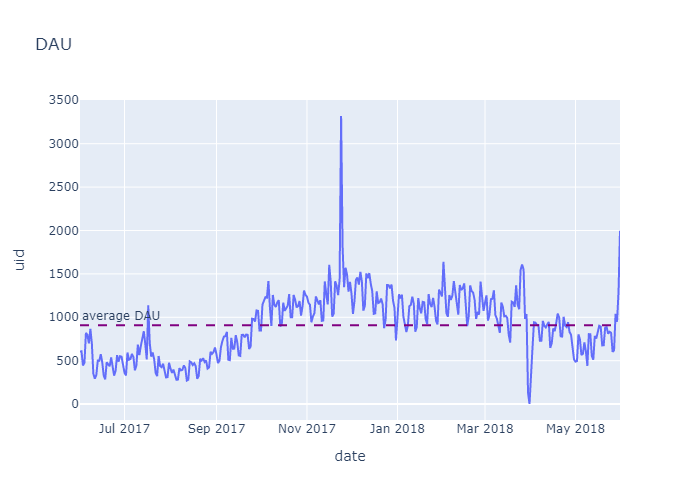

In [15]:
fig = px.line(dau, x = "date", y = "uid", title = 'DAU')
#adding reference line with average DAU over time
fig.add_hline(y = dau['uid'].mean(), line_dash="dash", line_color = "purple", annotation_text = "average DAU",
             annotation_position = "top left")
fig.show("png")

We see that the average number of daily active users is about 908. There are two unique dates where we have some extreme values: the highest is **November 24, 2017 which was 'Black Friday'**, probably there were a lot of discounts that encouraged users to visit the platform. The lowest is **March 31, 2018 where was only one visit. Also there are no records for the April 1, 2018**, maybe there was a problem with the platform.
In general we can say that in the summer month the visits are a bit lower than in the winter. There are some spikes, probably related to marketing and discounts. Also the small flactuations have a pattern - **the lowest points are of saturdays and sundays!** It is likely that most events take place over the weekend and that most people purchase tickets ahead of time.

In [16]:
#number of weekly active users 
wau = visits.groupby('week')['uid'].nunique().reset_index()
display(wau.head())
print('The average WAU is: {} active users a week'.format(np.round(wau['uid'].mean()).astype('int')))

,week,uid
0,2017-06-01,4082
1,2017-06-08,3311
2,2017-06-15,2844
3,2017-06-22,3079
4,2017-06-29,3055


The average WAU is: 5724 active users a week


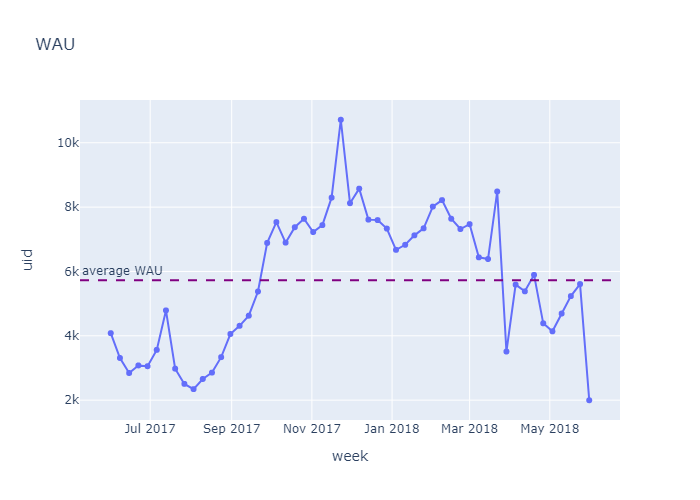

In [17]:
fig = px.line(wau, x="week", y="uid",title='WAU')
fig.update_traces(mode='markers+lines')

#adding reference line with average WAU over time
fig.add_hline(y=wau['uid'].mean(),line_dash="dash", line_color="purple", annotation_text="average WAU",
             annotation_position="top left")
fig.show("png")

We see that the trend is pretty similar to the DAU. The avarage number of weekly users is 5.7K. Below the average are the summer weeks and above it are the autumn and winter weeks. Maybe in the summer time people prefer to travel and enjoy in the nature, while in the winter it's too cold and they preffer to find attractions like concerts and shows.

In [18]:
#number of monthly active users 
mau = visits.groupby('month')['uid'].nunique().reset_index()
display(mau.head())
print('The average MAU is: {} active users a month'.format(np.round(mau['uid'].mean()).astype('int')))

,month,uid
0,2017-06-01,13259
1,2017-07-01,14183
2,2017-08-01,11631
3,2017-09-01,18975
4,2017-10-01,29692


The average MAU is: 23228 active users a month


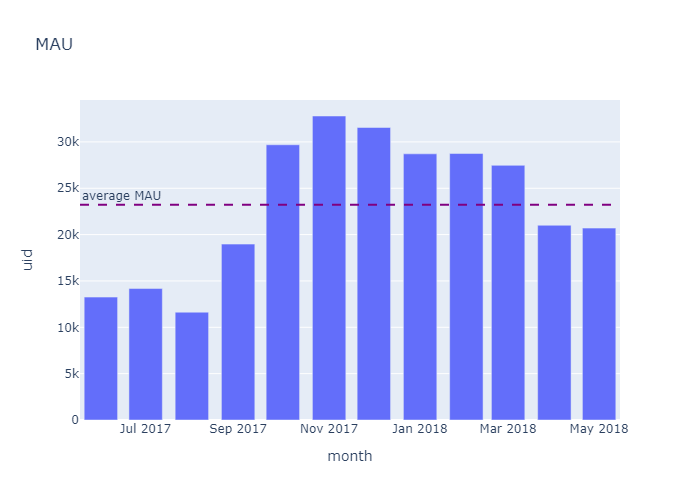

In [19]:
fig = px.bar(mau, x="month", y="uid", title='MAU')
#adding reference line with average MAU over time
fig.add_hline(y=mau['uid'].mean(),line_dash="dash", line_color="purple", annotation_text="average MAU",
             annotation_position="top left")
fig.show("png")

The average amount of monthly active users is 23K. Still the same trend we mentioned before - another possible reason is that in winter months it is harder to attract people and there are a lot of promotions and discounts that encourage users to visit the platform. We'll check later the marketing costs, the number of purchases and the revenue on those months.

Now we want to check the sticky factor - we can use this metric to evaluate how stable our user base is and how regular they go to our platform. It is calculated as follow:

*sticky_wau = dau / wau *100*

*sticky_mau = dau / mau *100*

In [20]:
sticky_factor = visits.groupby('date').agg({'uid':'nunique','week':'min','month':'min'}).reset_index()
sticky_factor.columns = ['date','dau','week','month']
sticky_factor.head()

,date,dau,week,month
0,2017-06-01,605,2017-06-01,2017-06-01
1,2017-06-02,608,2017-06-01,2017-06-01
2,2017-06-03,445,2017-06-01,2017-06-01
3,2017-06-04,476,2017-06-01,2017-06-01
4,2017-06-05,820,2017-06-01,2017-06-01


In [21]:
sticky_wau = visits.groupby('week').agg({'uid':'nunique'}).reset_index()
sticky_wau.columns = ['week','wau']
sticky_mau = visits.groupby('month').agg({'uid':'nunique'}).reset_index()
sticky_mau.columns = ['month','mau']

In [22]:
sticky_factor = sticky_factor.merge(sticky_wau, how = 'inner', on = 'week')
sticky_factor = sticky_factor.merge(sticky_mau, how = 'inner', on = 'month')
sticky_factor.head()

,date,dau,week,month,wau,mau
0,2017-06-01,605,2017-06-01,2017-06-01,4082,13259
1,2017-06-02,608,2017-06-01,2017-06-01,4082,13259
2,2017-06-03,445,2017-06-01,2017-06-01,4082,13259
3,2017-06-04,476,2017-06-01,2017-06-01,4082,13259
4,2017-06-05,820,2017-06-01,2017-06-01,4082,13259


In [23]:
sticky_factor['sticky_wau'] = sticky_factor['dau']/sticky_factor['wau']*100
sticky_factor['sticky_mau'] = sticky_factor['dau']/sticky_factor['mau']*100
sticky_factor.head()

,date,dau,week,month,wau,mau,sticky_wau,sticky_mau
0,2017-06-01,605,2017-06-01,2017-06-01,4082,13259,14.821166,4.562938
1,2017-06-02,608,2017-06-01,2017-06-01,4082,13259,14.894659,4.585565
2,2017-06-03,445,2017-06-01,2017-06-01,4082,13259,10.901519,3.356211
3,2017-06-04,476,2017-06-01,2017-06-01,4082,13259,11.660951,3.590014
4,2017-06-05,820,2017-06-01,2017-06-01,4082,13259,20.088192,6.184478


In [24]:
sticky_factor[['sticky_wau','sticky_mau']].describe()

,sticky_wau,sticky_mau
count,364.000000,364.000000
mean,15.790622,3.890665
std,5.382989,0.961279
min,0.028482,0.003640
25%,13.479314,3.366630
50%,15.856749,3.875673
75%,17.244087,4.336502
max,100.000000,10.119828


In [25]:
#calculate the average sticky factors
mau_total = mau['uid'].mean()
dau_total = dau['uid'].mean()
wau_total = wau['uid'].mean()

sticky_wau = dau_total/wau_total
print('The average weekly sticky factor is: {:.2%}'.format(sticky_wau))
sticky_mau = dau_total/mau_total
print('The average monthly sticky factor is: {:.2%}'.format(sticky_mau))

The average weekly sticky factor is: 15.86%
The average monthly sticky factor is: 3.91%


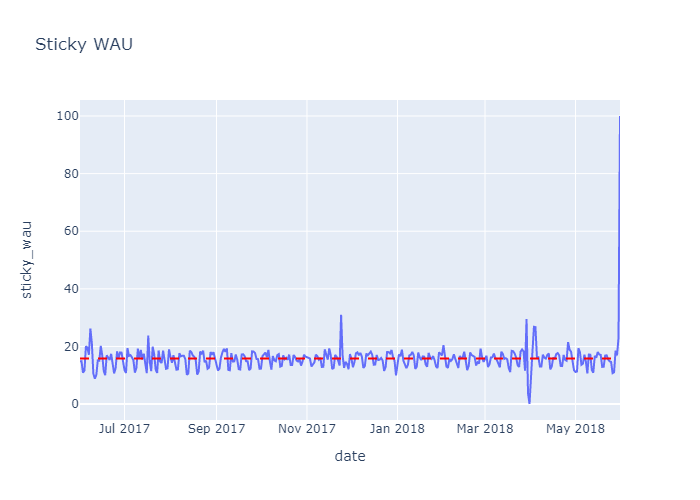

In [26]:
fig = px.line(sticky_factor, x="date", y="sticky_wau",title = 'Sticky WAU')
             
#adding reference line with average weekly sticky factor over time
fig.add_hline(y = sticky_wau*100,line_dash="dash", line_color="red")
fig.show("png")

We can see that it is stable all year long, except of spikes that correlated to the one that we mentioned before - black friday on November and probably a problem with the platform on the end of March. We see that the last day of the data has 100% which means it was the only day of the week that was recorded.
Assuming that 1,000 *different* users visit the platform every day, no one comes back again, we get 7,000 unique users per week. The lowest sticky_wau that is possible is (1000/7000)x100% which is 14.28%. Our avarage sticky_wau is pretty close to that value, which means that **most of the users don't return to the platform**. It makes sense becuase the platform is for buying tickets for different events, and usually people doesn't go on events on daily or even weekly basis.

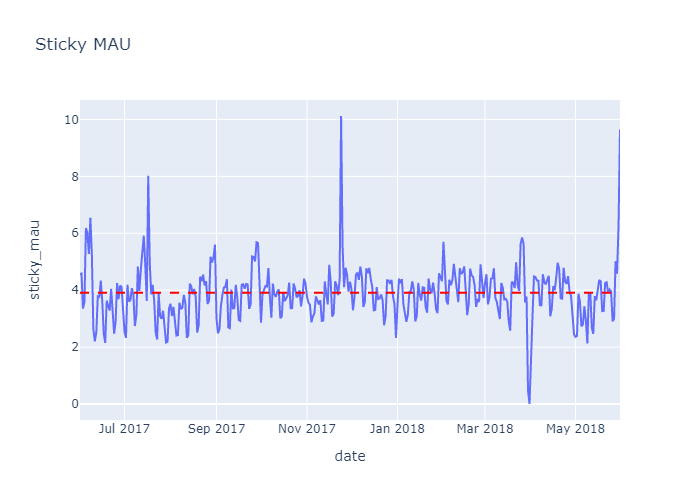

In [27]:
fig = px.line(sticky_factor, x="date", y="sticky_mau",title='Sticky MAU')
             
#adding reference line with average monthly sticky factor over time
fig.add_hline(y = sticky_mau*100, line_dash="dash", line_color="red")
fig.show("png")

Also this metric is pretty stable all year long, except of spikes that correlated to the one that we mentioned before.
Assuming that 1,000 *different* users visit the platform every day, no one comes back again, we get 30,000 unique users per month. The lowest sticky_mau that is possible is (1000/30000)x100% which is 3.33%. Our avarage sticky_mau is pretty close to that value, which means that **most of the users don't return to the platform**.

#### How many sessions are there per day? (One user might have more than one session)

In [28]:
dau_new = visits.groupby(visits['date'])['uid'].count().reset_index()
dau_new['dau'] = dau['uid']
dau_new['sessions_per_user'] = dau_new['uid']/dau_new['dau']
dau_new.head()

,date,uid,dau,sessions_per_user
0,2017-06-01,664,605,1.097521
1,2017-06-02,658,608,1.082237
2,2017-06-03,477,445,1.071910
3,2017-06-04,510,476,1.071429
4,2017-06-05,893,820,1.089024


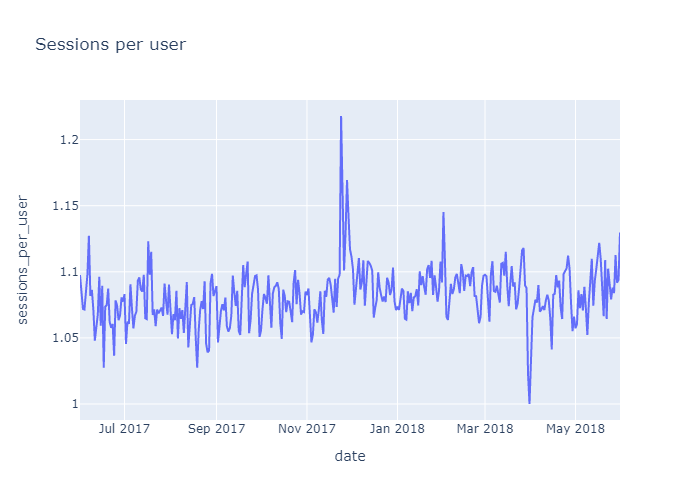

In [29]:
#plot sessions per user
fig = px.line(dau_new, x="date", y="sessions_per_user",title='Sessions per user')
fig.show("png")

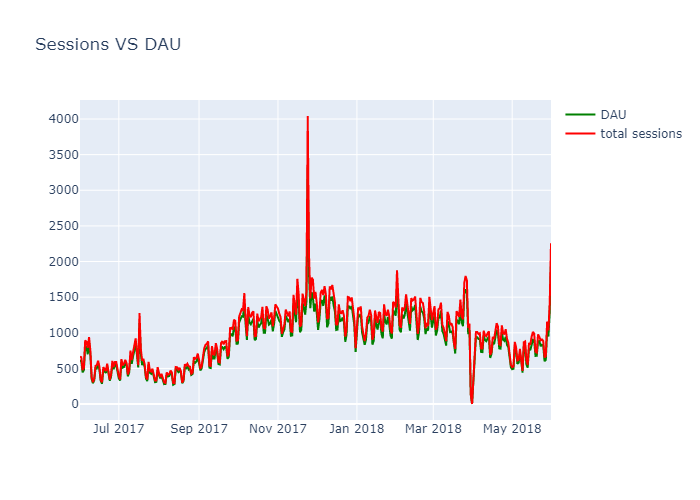

In [30]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dau_new['date'], 
                        y=dau_new['dau'],
                    mode='lines',
                    name='DAU',line = dict(color='green', width=2 )))

fig.add_trace(go.Scatter(x=dau_new['date'], 
                        y=dau_new['uid'], 
                    mode='lines',
                    name='total sessions',line = dict(color='red', width=2 )))

fig.update_layout(
    showlegend=True, title='Sessions VS DAU'
)

fig.show("png")

Only few users have more than one session a day. We see that the DAU is almost the same as total sessions.

#### What is the length of each session?

The length of each session is calculated as the difference between the end-timestemp and the start-timestamp and it's measured in seconds.

In [31]:
#calculate the duration
visits['duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

In [32]:
visits['duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: duration_sec, dtype: float64

There are sessions that are 0 sec long, maybe there were problems or they regreted immidiately. There is an extreme value of 84480, maybe the platform was open with no actions for a very long time.

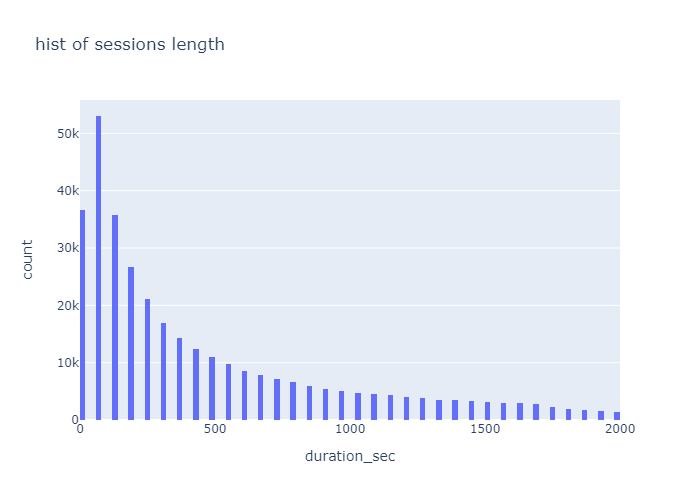

In [33]:
fig = px.histogram(visits, x="duration_sec", title = 'hist of sessions length')
fig.update_xaxes(range=(0,2000))
fig.show("png")

In [34]:
#visits with 0 sec length
visits[visits['duration_sec']==0]['uid'].count()

35794

The data is skewed and is abnormal so mean won't fit here. We'll check the median and the mode.

In [35]:
duration = visits.groupby(visits['date'])['duration_sec'].agg(pd.Series.mode).reset_index()
duration.columns = ['date','duration_sec_mode']
duration['duration_sec_median'] = visits.groupby(visits['date'])['duration_sec'].median().reset_index().loc[:,'duration_sec']
duration.head()

,date,duration_sec_mode,duration_sec_median
0,2017-06-01,60,300
1,2017-06-02,60,300
2,2017-06-03,60,300
3,2017-06-04,60,240
4,2017-06-05,60,300


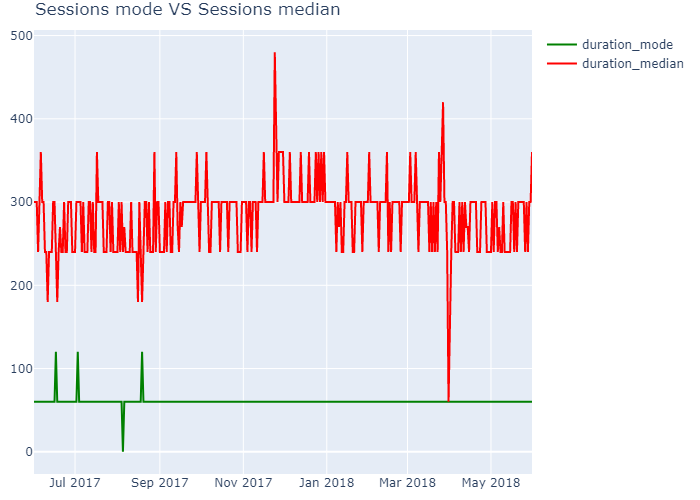

In [36]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=duration['date'], 
                        y=duration['duration_sec_mode'],
                    mode='lines',
                    name='duration_mode',line = dict(color='green', width=2 )))

fig.add_trace(go.Scatter(x=duration['date'], 
                        y=duration['duration_sec_median'], 
                    mode='lines',
                    name='duration_median',line = dict(color='red', width=2 )))


fig.update_layout(
    showlegend=True, title='Sessions mode VS Sessions median',
    margin=dict(t=30,l=30,b=10,r=10)
)


fig.show("png")

The average session length is around 300 sec but the most frquent session is 60 sec long.
Also the length of the sessions on black firday was longer than usual, not only the amount of the sessions.

#### How often do users come back?

In [37]:
#find the first session for each user
min_visit = visits.groupby('uid')['date'].min().reset_index()
min_visit.columns = ['uid', 'first_session']
min_visit.head()

,uid,first_session
0,11863502262781,2018-03-01
1,49537067089222,2018-02-06
2,297729379853735,2017-06-07
3,313578113262317,2017-09-18
4,325320750514679,2017-09-30


In [38]:
#merge to the original dataset
visits = visits.merge(min_visit, how = 'inner',on = 'uid')
#visits = visits.join(min_visit, on='uid', how = 'left')
visits.head()

,device,end_ts,source_id,start_ts,uid,date,week,month,duration_sec,first_session
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,1080,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,1680,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,1440,2018-03-09
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,2018-03-08,2018-03-01,1680,2018-03-09


In [39]:
visits['cohort'] = visits['first_session'].astype('datetime64[M]')
visits['age'] = ((pd.to_datetime(visits['start_ts']) - pd.to_datetime(visits['first_session'])) / np.timedelta64(1,'M')).round().astype('int')
visits.head()

,device,end_ts,source_id,start_ts,uid,date,week,month,duration_sec,first_session,cohort,age
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,1080,2017-12-20,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,1680,2018-02-19,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,1440,2018-03-09,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,2018-03-08,2018-03-01,1680,2018-03-09,2018-03-01,0


In [40]:
#how many users were active from certain cohorts on a certain time after registration
cohorts = visits.pivot_table(index='cohort',
                  columns='age',
                  values='uid',
                  aggfunc='nunique')
cohorts

age,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2017-06-01,13259.0,1006.0,708.0,813.0,924.0,875.0,864.0,735.0,742.0,660.0,557.0,535.0,187.0
2017-07-01,13140.0,753.0,676.0,708.0,745.0,633.0,602.0,638.0,493.0,385.0,329.0,75.0,NaN
2017-08-01,10181.0,719.0,627.0,604.0,527.0,426.0,429.0,347.0,295.0,237.0,37.0,NaN,NaN
2017-09-01,16704.0,1298.0,1105.0,833.0,668.0,656.0,565.0,427.0,340.0,45.0,NaN,NaN,NaN
2017-10-01,25977.0,1962.0,1361.0,1003.0,954.0,800.0,559.0,467.0,90.0,NaN,NaN,NaN,NaN
2017-11-01,27248.0,1951.0,1259.0,1061.0,870.0,651.0,511.0,77.0,NaN,NaN,NaN,NaN,NaN
2017-12-01,25268.0,1324.0,1040.0,741.0,557.0,406.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,22624.0,1249.0,816.0,585.0,401.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,22197.0,1094.0,594.0,412.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
#retention rate - the same data devided by the initial size of the cohort
retention = cohorts.iloc[:,1:].div(cohorts[0], axis=0)
retention

age,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,
2017-06-01,0.075873,0.053398,0.061317,0.069689,0.065993,0.065163,0.055434,0.055962,0.049778,0.042009,0.040350,0.014104
2017-07-01,0.057306,0.051446,0.053881,0.056697,0.048174,0.045814,0.048554,0.037519,0.029300,0.025038,0.005708,NaN
2017-08-01,0.070622,0.061585,0.059326,0.051763,0.041843,0.042137,0.034083,0.028976,0.023279,0.003634,NaN,NaN
2017-09-01,0.077706,0.066152,0.049868,0.039990,0.039272,0.033824,0.025563,0.020354,0.002694,NaN,NaN,NaN
2017-10-01,0.075528,0.052393,0.038611,0.036725,0.030796,0.021519,0.017977,0.003465,NaN,NaN,NaN,NaN
2017-11-01,0.071602,0.046205,0.038939,0.031929,0.023892,0.018754,0.002826,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.052398,0.041159,0.029326,0.022044,0.016068,0.003087,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.055207,0.036068,0.025857,0.017725,0.001989,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.049286,0.026760,0.018561,0.002388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


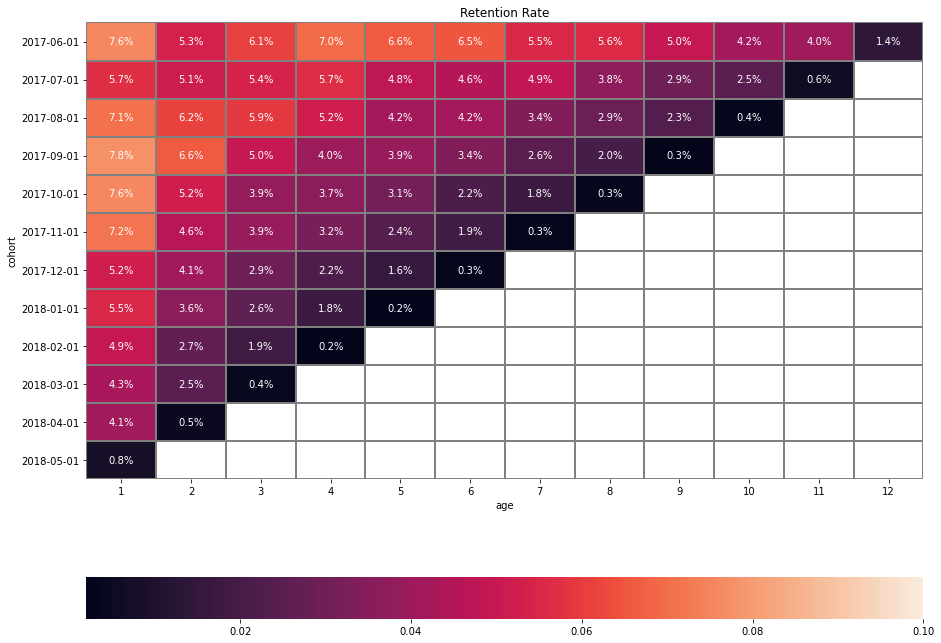

In [42]:
retention.index=retention.index.astype(str)
plt.figure(figsize=(15,12))
sns.heatmap(retention, annot=True, linewidths=1, fmt='.1%', linecolor='grey', vmax=0.1, cbar_kws= {'orientation': 'horizontal'} 
            ).set(title = 'Retention Rate')
plt.show()

In [43]:
#mean retention rates for each month of cohort life
retention.mean()*100

age
1     5.642931
2     4.228918
3     3.796207
4     3.654987
5     3.350325
6     3.289982
7     3.073954
8     2.925511
9     2.626249
10    2.356049
11    2.302886
12    1.410363
dtype: float64

In [44]:
print('The mean retention rate for the second month of cohort life: {:.2%}'.format(retention[2].mean()))

The mean retention rate for the second month of cohort life: 4.23%


The first cohort shows the best retention rates. We can see a sesonality here, the best retention rates are from July to November which is interesting because the number of visists decreases in the summer. Most of the cohorts act the same - the retention rate decreases with the age. Only the two first cohorts have some flactuations in the first 4 months.
The average retention rate for the second month of cohort life is 4.23% and we can see that as we mentioned, the best retention rates are for the cohorts between June to November.

### 2.2 Sales
<a class="anchor" id="chapter2.2"></a>

Till this point we dealed with visits, now we want to focus on purchases.

#### When do people start buying?

In [45]:
#for each user find the time of first order
first_order = orders.groupby(['uid'])['date'].min().reset_index()
first_order.columns = ['uid', 'first_order']
first_order.head()

,uid,first_order
0,313578113262317,2018-01-03
1,1575281904278712,2017-06-03
2,2429014661409475,2017-10-11
3,2464366381792757,2018-01-28
4,2551852515556206,2017-11-24


In [46]:
sales = first_order.merge(min_visit, how ='left',on =['uid'])
sales.head()

,uid,first_order,first_session
0,313578113262317,2018-01-03,2017-09-18
1,1575281904278712,2017-06-03,2017-06-03
2,2429014661409475,2017-10-11,2017-10-11
3,2464366381792757,2018-01-28,2018-01-27
4,2551852515556206,2017-11-24,2017-11-24


In [47]:
sales['conversion'] = ((pd.to_datetime(sales['first_order'])-pd.to_datetime(sales['first_session']))
                      /np.timedelta64(1,'D')).astype('int')

In [48]:
sales['conversion'].describe()

count    36509.000000
mean        16.910159
std         47.093476
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: conversion, dtype: float64

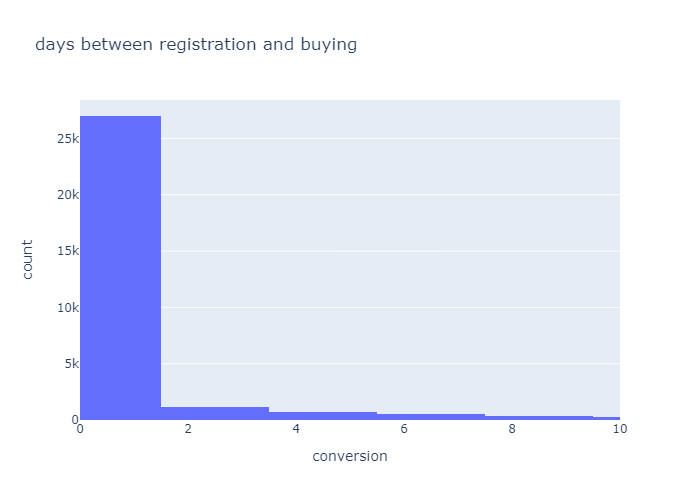

In [49]:
fig = px.histogram(sales, x="conversion", title = 'days between registration and buying')
fig.update_xaxes(range=(0,10))
fig.show("png")

In [50]:
sales['conversion'].median()

0.0

Most of the users purchase in the same day they registered.

In [51]:
print('The overall conversion is {:.1%}'.format(sales['uid'].nunique()/visits['uid'].nunique()))

The overall conversion is 16.0%


It means that 16% of all visitors bacome buyers.

#### How many orders do they make during a given period of time?

In [52]:
#merge orders with first order
orders = orders.merge(first_order, how ='left',on =['uid'])
orders.head()

,buy_ts,revenue,uid,date,week,month,first_order
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01


In [53]:
#define cohorts based on first order
orders['first_order_month'] = orders['first_order'].astype('datetime64[M]')
orders.head()

,buy_ts,revenue,uid,date,week,month,first_order,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01


In [54]:
#calculate the cohorts sizes
cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month','cohort_size']
cohort_sizes.head()

,first_order_month,cohort_size
0,2017-06-01,2022
1,2017-07-01,1922
2,2017-08-01,1369
3,2017-09-01,2579
4,2017-10-01,4340


In [55]:
#calculate the number of purchases for cohort and month
cohort = orders.groupby(['first_order_month','month'])['revenue'].count().reset_index()
cohort.columns = ['first_order_month','month','orders']
#merge cohort with cohort size
cohort = cohort.merge(cohort_sizes, on = ['first_order_month'])
cohort['age_month'] = ((cohort['month'] - cohort['first_order_month']) / np.timedelta64(1,'M')).round().astype('int')
cohort['orders_per_buyer'] = cohort['orders']/cohort['cohort_size']
cohort.head()

,first_order_month,month,orders,cohort_size,age_month,orders_per_buyer
0,2017-06-01,2017-06-01,2353,2022,0,1.163699
1,2017-06-01,2017-07-01,177,2022,1,0.087537
2,2017-06-01,2017-08-01,171,2022,2,0.084570
3,2017-06-01,2017-09-01,224,2022,3,0.110781
4,2017-06-01,2017-10-01,291,2022,4,0.143917


In [56]:
#calculate the comulative sum of purchases per user in each age
cohort_piv = cohort.pivot_table(
    index = 'first_order_month', 
    columns = 'age_month', 
    values = 'orders_per_buyer', 
    aggfunc = 'sum'
).cumsum(axis=1)

cohort_piv.round(2).fillna('')

age_month,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.16,1.25,1.34,1.45,1.59,1.7,1.83,1.92,2.03,2.1,2.15,2.19
2017-07-01,1.14,1.19,1.25,1.31,1.34,1.39,1.42,1.44,1.47,1.49,1.51,
2017-08-01,1.12,1.2,1.27,1.33,1.39,1.44,1.47,1.53,1.56,1.6,,
2017-09-01,1.14,1.22,1.28,1.35,1.37,1.41,1.46,1.48,1.5,,,
2017-10-01,1.14,1.22,1.25,1.28,1.31,1.34,1.35,1.38,,,,
2017-11-01,1.18,1.27,1.32,1.37,1.4,1.42,1.44,,,,,
2017-12-01,1.15,1.21,1.26,1.3,1.32,1.34,,,,,,
2018-01-01,1.12,1.19,1.24,1.25,1.28,,,,,,,
2018-02-01,1.12,1.18,1.2,1.22,,,,,,,,


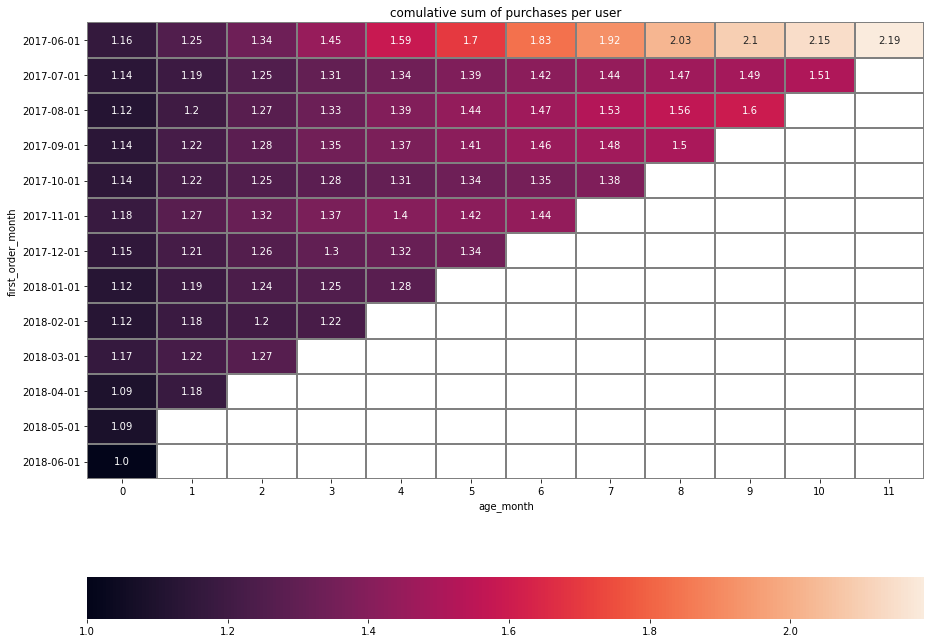

In [57]:
cohort_piv.index = cohort_piv.index.astype(str)
plt.figure(figsize=(15,12))
sns.heatmap(cohort_piv, annot=True, linewidths=1, fmt='.3',linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title = 'comulative sum of purchases per user');
plt.show()

In [58]:
print('Overall average number of orders per user: {:.2f}'.format(len(orders)/orders.uid.nunique()))

Overall average number of orders per user: 1.38


Except the first cohrt, the same values are seen in all the cohorts in the aggregated amount of purchases per user. Not many users purchase again. In this term the first cohort is the most successfull with a great differnce. A little bit more users came back and purchased.

#### What is the average purchase size?

In [59]:
#calculatetotal check for each order
avg_check = orders.groupby(['uid','date'])['revenue'].sum().reset_index()
avg_check['revenue'].describe()

count    46518.000000
mean         5.418487
std         27.240961
min          0.010000
25%          1.340000
50%          2.750000
75%          5.330000
max       4079.170000
Name: revenue, dtype: float64

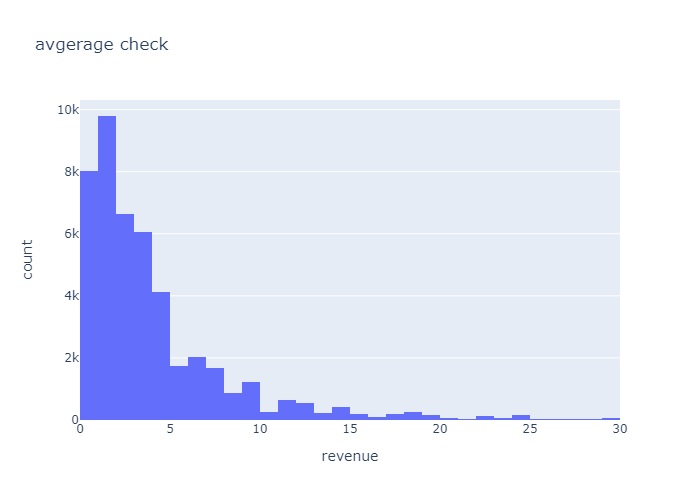

In [60]:
fig = px.histogram(avg_check, x="revenue",title = 'avgerage check')
fig.update_xaxes(range=(0,30))
fig.show("png")

As we can see, the data is skewed so the right property will be median. The overall average check is about 2.75. We want to see how the average check changes over time and cohorts.

In [61]:
#define cohorts based on first order
avg_cohort = orders.groupby(['first_order_month','month'])['revenue'].median().reset_index()
avg_cohort['age_month'] = ((avg_cohort['month'] - avg_cohort['first_order_month'])/np.timedelta64(1,'M')).round().astype('int')
avg_cohort.head()

,first_order_month,month,revenue,age_month
0,2017-06-01,2017-06-01,2.44,0
1,2017-06-01,2017-07-01,3.60,1
2,2017-06-01,2017-08-01,3.05,2
3,2017-06-01,2017-09-01,4.28,3
4,2017-06-01,2017-10-01,3.30,4


In [62]:
#calculate the average check of each cohort in each age
avg_cohort_piv = avg_cohort.pivot_table(
    index = 'first_order_month', 
    columns = 'age_month', 
    values = 'revenue', 
    aggfunc = 'mean'
)

avg_cohort_piv.round(2).fillna('')

age_month,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,2.44,3.6,3.05,4.28,3.3,2.44,3.05,3.05,3.39,3.67,4.28,1.83
2017-07-01,3.05,2.81,3.85,3.05,2.38,2.44,2.44,3.58,2.26,4.64,3.67,
2017-08-01,2.76,3.79,3.67,4.28,4.58,3.67,3.05,3.05,4.73,3.42,,
2017-09-01,2.44,4.89,2.84,5.53,2.93,4.89,3.67,3.48,3.91,,,
2017-10-01,2.44,2.75,2.69,2.72,3.3,2.62,2.38,2.57,,,,
2017-11-01,2.44,1.95,1.83,3.18,2.1,2.44,3.12,,,,,
2017-12-01,2.67,2.41,2.96,3.05,2.36,2.44,,,,,,
2018-01-01,2.44,2.44,2.44,3.05,2.08,,,,,,,
2018-02-01,2.44,2.44,2.33,2.26,,,,,,,,


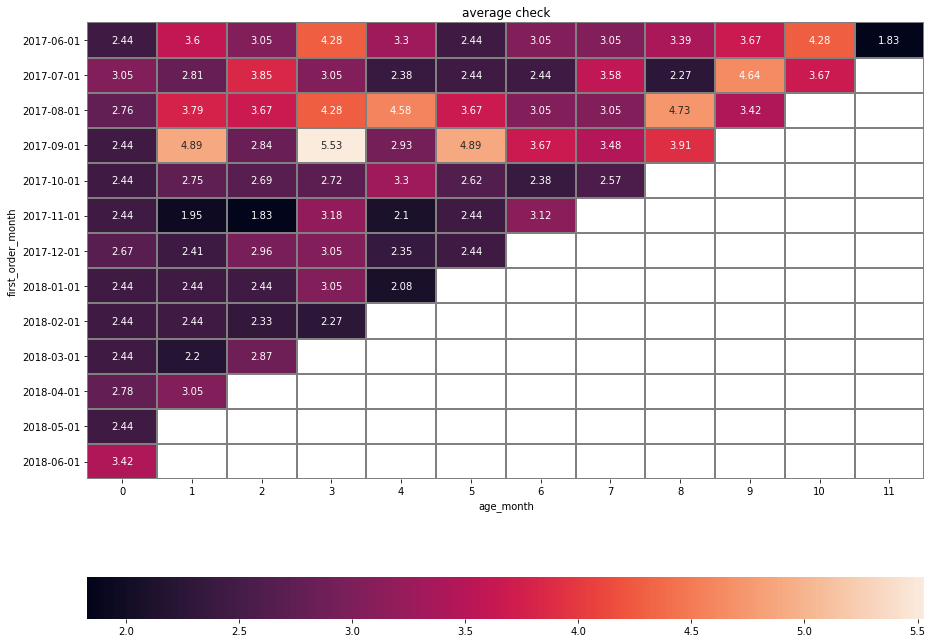

In [63]:
avg_cohort_piv.index = avg_cohort_piv.index.astype(str)
plt.figure(figsize=(15,12))
sns.heatmap(avg_cohort_piv, annot=True, linewidths=1, fmt='.3',linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title = 'average check');
plt.show()

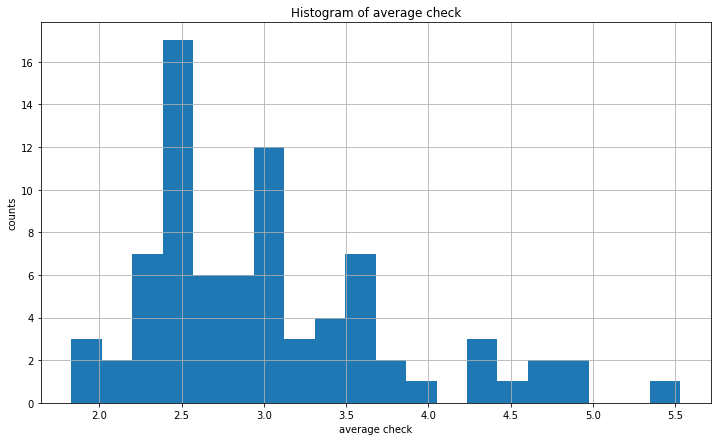

In [64]:
avg_cohort.hist('revenue',bins = 20, figsize = (12,7))
plt.xlabel('average check')
plt.ylabel('counts')
plt.title('Histogram of average check');

The data is skewed so we'll take the median.

In [65]:
print('The average purchase size: {:.2f}$'.format(avg_cohort['revenue'].median()))

The average purchase size: 2.87$


The highest average purchase size is of the 2017-08 and 2017-09 cohorts where December is the highest with a great difference for the 2017-09 cohort with a value of 5.53 average purchase size. It makes sense that such a difference will happen in the holidays.

#### How much money do they bring? (LTV)

In [66]:
#revenue per cohort in each month
ltv_cohort = orders.groupby(['first_order_month','month'])['revenue'].sum().reset_index()
#merge with the cohort size
ltv_cohort = ltv_cohort.merge(cohort_sizes,on=['first_order_month'])
ltv_cohort['age'] = ((ltv_cohort['month'] - ltv_cohort['first_order_month']) / np.timedelta64(1,'M')).round().astype('int')
ltv_cohort['ltv'] = ltv_cohort['revenue']/ltv_cohort['cohort_size']
ltv_cohort.head()

,first_order_month,month,revenue,cohort_size,age,ltv
0,2017-06-01,2017-06-01,9557.49,2022,0,4.726751
1,2017-06-01,2017-07-01,981.82,2022,1,0.485569
2,2017-06-01,2017-08-01,885.34,2022,2,0.437854
3,2017-06-01,2017-09-01,1931.30,2022,3,0.955143
4,2017-06-01,2017-10-01,2068.58,2022,4,1.023037


In [67]:
#calculate the cumulative sum of ltv per cohort and age
ltv_cohort_piv = ltv_cohort.pivot_table(
    index = 'first_order_month', 
    columns = 'age', 
    values = 'ltv', 
    aggfunc = 'sum'
).cumsum(axis=1)


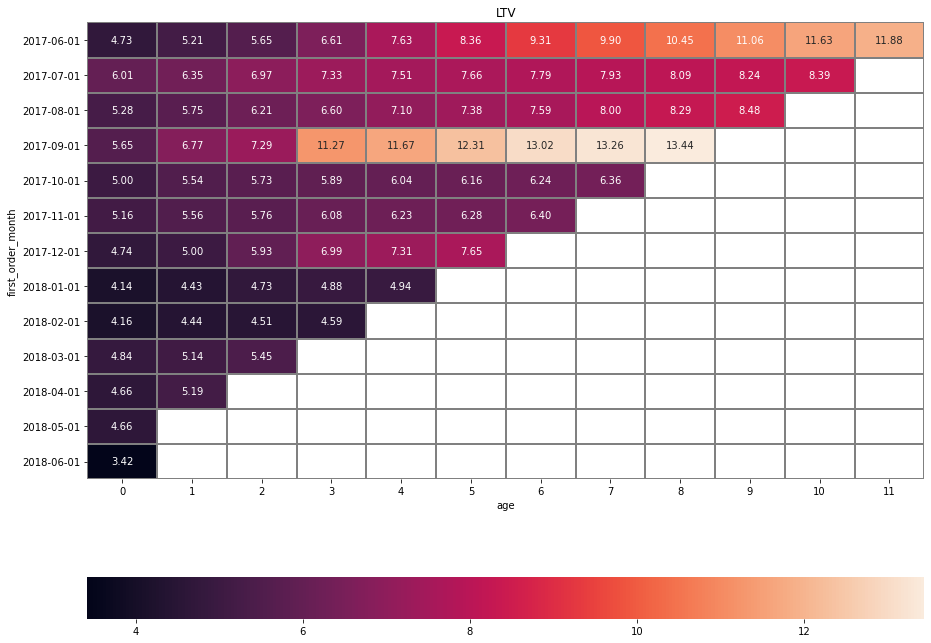

In [68]:
ltv_cohort_piv.index = ltv_cohort_piv.index.astype(str)
plt.figure(figsize=(15,12))
sns.heatmap(ltv_cohort_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='LTV')
plt.show()

In [69]:
print('The average LTV for 6 months is: {:.2f}$ per user'.format(ltv_cohort_piv[6].median()))

The average LTV for 6 months is: 7.69$ per user


The most successfull cohort in terms of lifetime value is the 2017-09 cohort, with a great difference. It correlates with the fact that this cohort also had the highest average checks. As the first cohort is the oldest. it makes sense that it has the highest cumulative LTV at the end.

### 2.3 Marketing
<a class="anchor" id="chapter2.3"></a>

#### How much money was spent? Overall/per source/over time

In [70]:
marketing = costs.groupby(['cost_month','source_id']).agg({'costs':'sum'}).reset_index()
marketing.head()

,cost_month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


In [71]:
print('Total marketing cost is {:.0f}$'.format(marketing['costs'].sum()))

Total marketing cost is 329132$


In [72]:
#total costs per source
marketing_per_source = marketing.groupby('source_id')['costs'].sum().reset_index().sort_values('costs', ascending = False)
marketing_per_source

,source_id,costs
2,3,141321.63
3,4,61073.60
4,5,51757.10
1,2,42806.04
0,1,20833.27
6,10,5822.49
5,9,5517.49


In [73]:
#total costs per month
marketing_per_month = marketing.groupby('cost_month')['costs'].sum().reset_index()
marketing_per_month

,cost_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


In [74]:
print('The average marketing costs per month: {:.2f}$'.format(marketing_per_month.costs.mean()))

The average marketing costs per month: 27427.63$


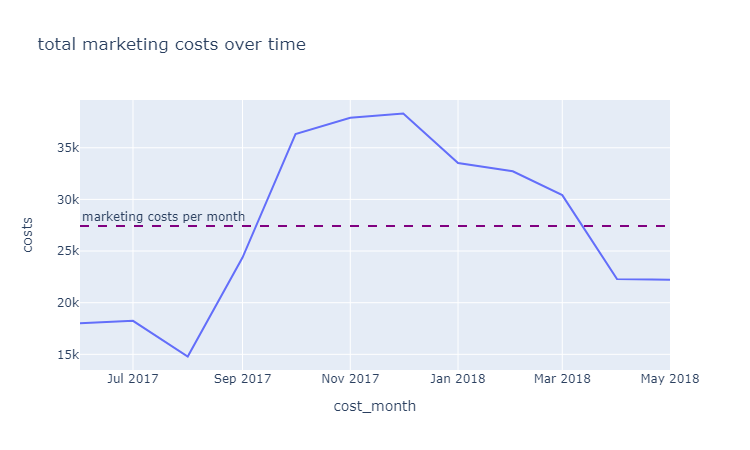

In [75]:
#monthly costs
fig = px.line(marketing_per_month, x="cost_month", y="costs", 
              width=750, height=450, title = 'total marketing costs over time')
fig.add_hline(y=marketing_per_month['costs'].mean(),line_dash="dash", line_color="purple", 
              annotation_text="marketing costs per month", annotation_position="top left")

fig.show("png")

We see that the lowest marketing costs are in August and most of the marketing costs are spent between September to March.

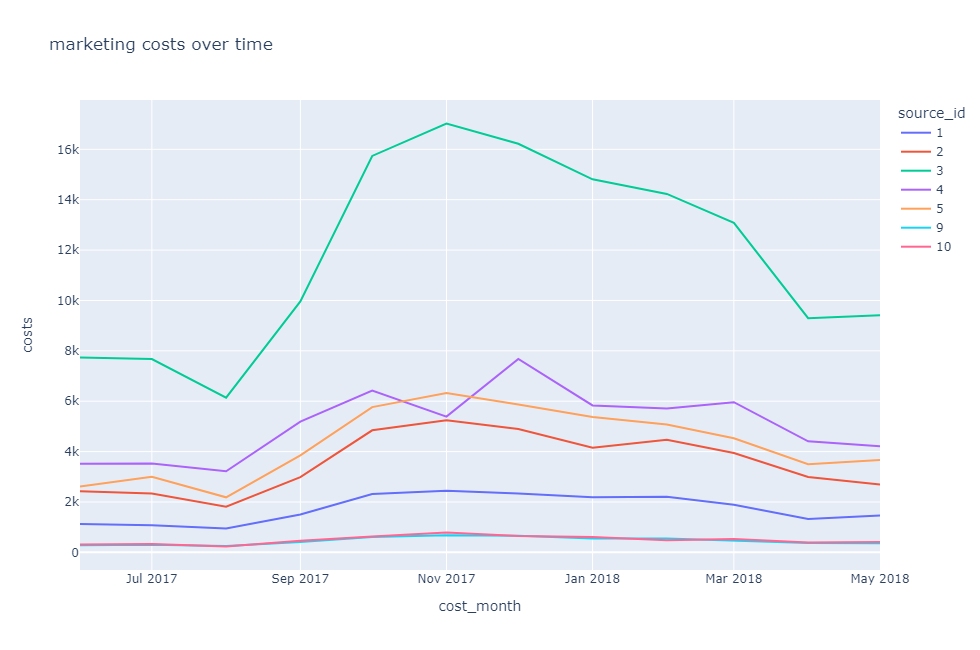

In [76]:
#costs over time
fig = px.line(marketing, x="cost_month", y="costs", color='source_id', 
              width=980, height=650, title = 'marketing costs over time')

fig.show("png")

Sources 6-8 doesn't exist. Source 3 is the most expensive and is 141321.63$ in total, more than double of the next expensive source. Source 9 is the cheapest. All the sources have the highest peak in November (black friday), except source 4.
Most of the marketing expenses were between October to March. In August the expenses are the lowest. 
As source 3 is much more expensive than the others, we see it's affect on the total costs per month. Let's check the correlation between the marketing costs and the DAU/WAU/MAU and also the revenue.

In [77]:
#calculate the dau per source
source_dau = visits.groupby(['date','source_id'])['uid'].nunique().reset_index()
source_dau.columns = ['dt','source_id','dau']
source_dau['dt'] = pd.to_datetime(source_dau['dt'])
#calculate the mau per source
source_wau = visits.groupby(['week','source_id'])['uid'].nunique().reset_index()
source_wau.columns = ['cost_week','source_id','wau']
source_wau['cost_week'] = pd.to_datetime(source_wau['cost_week'])
#calculate the mau per source
source_mau = visits.groupby(['month','source_id'])['uid'].nunique().reset_index()
source_mau.columns = ['cost_month','source_id','mau']
source_mau['cost_month'] = pd.to_datetime(source_mau['cost_month'])

In [78]:
#add a column to ease the calculations
costs['cost_week']  = costs['dt'].astype('datetime64[W]')
costs.head()

,source_id,dt,costs,cost_month,cost_week
0,1,2017-06-01,75.20,2017-06-01,2017-06-01
1,1,2017-06-02,62.25,2017-06-01,2017-06-01
2,1,2017-06-03,36.53,2017-06-01,2017-06-01
3,1,2017-06-04,55.00,2017-06-01,2017-06-01
4,1,2017-06-05,57.08,2017-06-01,2017-06-01


In [79]:
#merge source_dau/wau/mau to marketing
correlation_table = costs.merge(source_dau, on=['dt','source_id'], how='left')
correlation_table = correlation_table.merge(source_wau, on=['cost_week','source_id'], how='left')
correlation_table = correlation_table.merge(source_mau, on=['cost_month','source_id'], how='left')
correlation_table.head()

,source_id,dt,costs,cost_month,cost_week,dau,wau,mau
0,1,2017-06-01,75.20,2017-06-01,2017-06-01,61.0,341,972
1,1,2017-06-02,62.25,2017-06-01,2017-06-01,50.0,341,972
2,1,2017-06-03,36.53,2017-06-01,2017-06-01,37.0,341,972
3,1,2017-06-04,55.00,2017-06-01,2017-06-01,44.0,341,972
4,1,2017-06-05,57.08,2017-06-01,2017-06-01,73.0,341,972


In [80]:
#calculate the daily revenue per source
revenue_per_source = orders.groupby(['date','uid'])['revenue'].sum().reset_index()
#we assume that in each day the session of a scpecific user were from the same source
source_of_purchase = visits.groupby(['date','uid'])['source_id'].sum().reset_index()
revenue_per_source = revenue_per_source.merge(source_of_purchase, on =['date','uid'], how ='left')
revenue_per_source.columns = ['dt','uid','revenue','source_id']
revenue_per_source['dt'] = pd.to_datetime(revenue_per_source['dt'])
revenue_per_source = revenue_per_source.groupby(['dt','source_id'])['revenue'].sum().reset_index()
correlation_table = correlation_table.merge(revenue_per_source,on = ['dt','source_id'],how ='left')
correlation_table.head()

,source_id,dt,costs,cost_month,cost_week,dau,wau,mau,revenue
0,1,2017-06-01,75.20,2017-06-01,2017-06-01,61.0,341,972,135.32
1,1,2017-06-02,62.25,2017-06-01,2017-06-01,50.0,341,972,30.80
2,1,2017-06-03,36.53,2017-06-01,2017-06-01,37.0,341,972,18.38
3,1,2017-06-04,55.00,2017-06-01,2017-06-01,44.0,341,972,7.09
4,1,2017-06-05,57.08,2017-06-01,2017-06-01,73.0,341,972,51.77


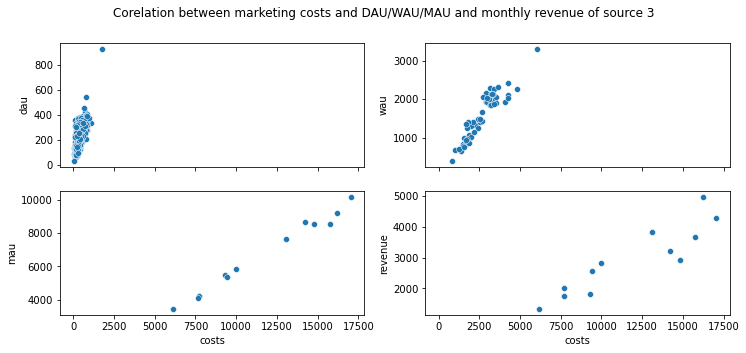

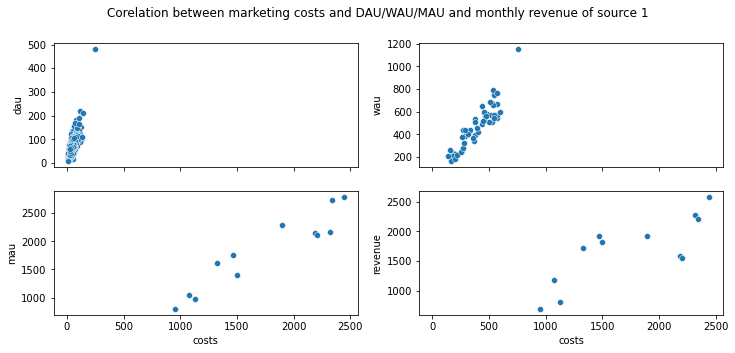

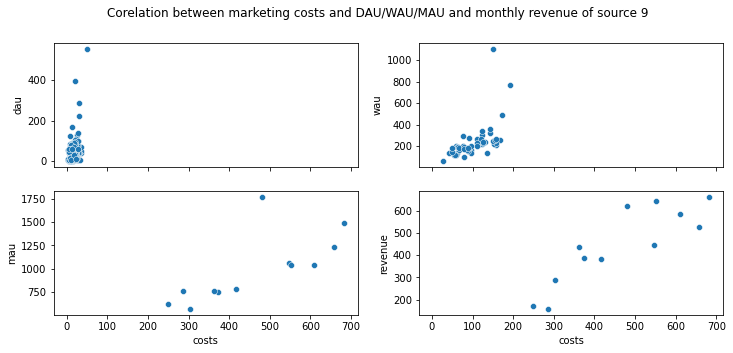

In [81]:
#function for graphing the correlations
def multi_scatter(df):
    sources = [3,1,9]
    for i in sources:
        sliced = df.query('source_id == @i')
        cost = sliced.groupby(['dt']).agg({'costs':'sum','dau':'sum'}).reset_index()
        week_cost = sliced.groupby(['cost_week']).agg({'costs':'sum','wau':'mean'}).reset_index()
        month_cost = sliced.groupby(['cost_month']).agg({'costs':'sum','mau':'mean'}).reset_index()
        monthly_revenue = sliced.groupby(['cost_month']).agg({'costs':'sum','revenue':'sum'}).reset_index()
        
        fig, axes = plt.subplots(2,2,figsize=(12, 5),sharex=True)
        sns.scatterplot(x='costs',y='dau',data = cost, ax=axes[0,0])
        sns.scatterplot(x='costs',y='wau',data  = week_cost, ax=axes[0,1])
        sns.scatterplot(x='costs',y='mau',data = month_cost, ax=axes[1,0])
        sns.scatterplot(x='costs',y='revenue',data = monthly_revenue, ax=axes[1,1])
        fig.suptitle(
            'Corelation between marketing costs and DAU/WAU/MAU and monthly revenue of source ' + str(i),fontdict={'size':13})
        plt.show();
        
multi_scatter(correlation_table)

For the DAU it's hard to see the correlation, but for all the other parameters we see a strong positive correlation with the costs of the marketing.

#### How much did customer acquisition from each of the sources cost?

In [82]:
#total costs of marketing per month
marketing_by_month = marketing.groupby(['cost_month'])['costs'].sum().reset_index()
marketing_by_month.head()

,cost_month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88


In [83]:
#amount of buyers per month
buyers_per_moth = orders.groupby(['first_order_month'])['uid'].nunique().reset_index()
buyers_per_moth.columns=['cost_month','buyers']
buyers_per_moth.head()

,cost_month,buyers
0,2017-06-01,2022
1,2017-07-01,1922
2,2017-08-01,1369
3,2017-09-01,2579
4,2017-10-01,4340


In [84]:
#calculate the CAC metric
CAC_per_month = marketing_by_month.merge(buyers_per_moth,how='left',on=['cost_month'])
CAC_per_month['CAC'] = CAC_per_month['costs']/CAC_per_month['buyers']
CAC_per_month.head()

,cost_month,costs,buyers,CAC
0,2017-06-01,18015.00,2022,8.909496
1,2017-07-01,18240.59,1922,9.490421
2,2017-08-01,14790.54,1369,10.803901
3,2017-09-01,24368.91,2579,9.448976
4,2017-10-01,36322.88,4340,8.369327


In [85]:
print('The average CAC is: {:.2f}$ per user'.format(CAC_per_month['CAC'].mean()))

The average CAC is: 9.15$ per user


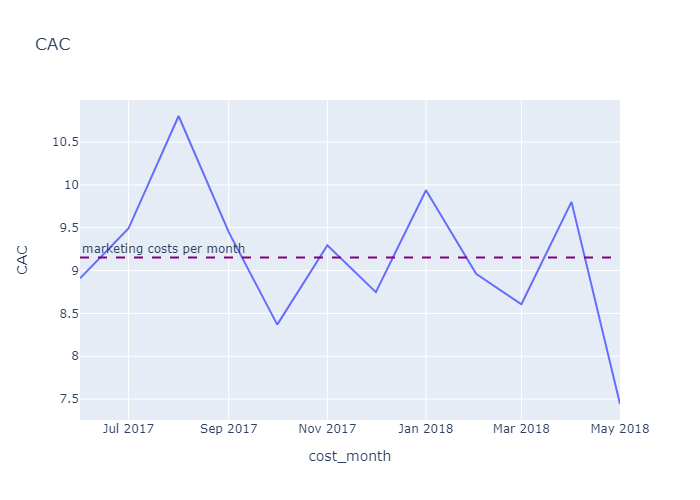

In [86]:
fig = px.line(CAC_per_month, x="cost_month", y="CAC", title='CAC')
fig.add_hline(y=CAC_per_month['CAC'].mean(),line_dash="dash", line_color="purple", 
              annotation_text="marketing costs per month", annotation_position="top left")
fig.show("png")

We see that the lowest CAC is in May 2018 and the highest August 2017 which was also the month with the lowest activity and the lowest marketing investment (which explains why the CAC is so high).
From September 2017 to April 2018, we see a somewhat similar CAC with a slight differences.

In [87]:
CAC_per_month['CAC'].describe()

count    12.000000
mean      9.151401
std       0.857088
min       7.442823
25%       8.712465
50%       9.129231
75%       9.568276
max      10.803901
Name: CAC, dtype: float64

The overall average CAC is 9.14, which means that it costs 9.14 to bring new customer. Let's check how does it correlate with revenue.

In [88]:
cac_revenue = orders.groupby('month').agg({'revenue':'sum'}).reset_index()
cac_revenue['CAC'] = CAC_per_month['CAC']
cac_revenue.corr()

,revenue,CAC
revenue,1.000000,-0.509342
CAC,-0.509342,1.000000


There's a strong negative correlation between the CAC and revenue, when the CAC is low the higher the revenue, which totally makes sense.

#### CAC per source

First we'll check if there are users that used different sources.

In [89]:
#numbers of unique sources per users
visits.groupby(['uid'])['source_id'].nunique().reset_index()['source_id'].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

Not all users have one source, so we'll define the first that they came from as the main source.

In [90]:
first_source = visits.sort_values('date').groupby('uid').first()['source_id'].reset_index()
first_source.columns = ['uid','first_source']
first_source.head()

,uid,first_source
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5


In [91]:
#merge orders wuth first_source
orders = orders.merge(first_source,on=['uid'],how='left')
orders.head()

,buy_ts,revenue,uid,date,week,month,first_order,first_order_month,first_source
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,3


In [92]:
#calculate the marketing costs for each source in every month
marketing_by_month_source = marketing.groupby(['cost_month','source_id'])['costs'].sum().reset_index()
marketing_by_month_source.head()

,cost_month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


In [93]:
#how many new buyers on each month
buyers_per_moth_source = orders.groupby(['first_order_month','first_source'])['uid'].nunique().reset_index()
buyers_per_moth_source.columns=['cost_month','source_id','buyers']
buyers_per_moth_source.head()

,cost_month,source_id,buyers
0,2017-06-01,1,217
1,2017-06-01,2,236
2,2017-06-01,3,618
3,2017-06-01,4,401
4,2017-06-01,5,390


In [94]:
#cac calculations
CAC_per_month_source = marketing_by_month_source.merge(buyers_per_moth_source,how='left',on=['cost_month','source_id'])
CAC_per_month_source['CAC'] = CAC_per_month_source['costs']/CAC_per_month_source['buyers']
CAC_per_month_source.head()

,cost_month,source_id,costs,buyers,CAC
0,2017-06-01,1,1125.61,217,5.187143
1,2017-06-01,2,2427.38,236,10.285508
2,2017-06-01,3,7731.65,618,12.510761
3,2017-06-01,4,3514.80,401,8.765087
4,2017-06-01,5,2616.12,390,6.708000


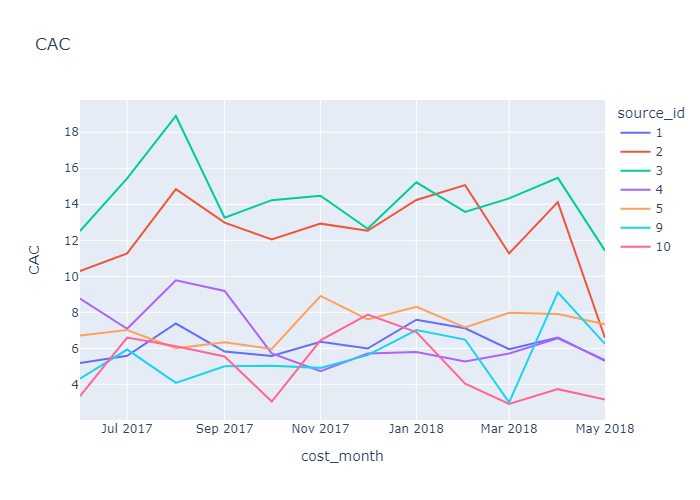

In [95]:
fig = px.line(CAC_per_month_source, x="cost_month", y="CAC",color='source_id',title='CAC')
fig.show("png")

In [96]:
#overall average CAC per source
CAC_per_month_source.groupby('source_id')['CAC'].mean()

source_id
1      6.205710
2     12.346101
3     14.288947
4      6.638948
5      7.268827
9      5.564656
10     4.975910
Name: CAC, dtype: float64

We see that for the most expensive sources, the highest CAC is around July and in November december are around the average. For the cheapest sources it's quite different, the highest CAC is around December.

#### How worthwhile where the investments? (ROI)

In [97]:
CAC_per_month_ROI = CAC_per_month[['cost_month','CAC']]
CAC_per_month_ROI.columns = ['first_order_month','CAC']
ROI = ltv_cohort.merge(CAC_per_month_ROI, on = ['first_order_month'], how = 'left')
ROI.head()

,first_order_month,month,revenue,cohort_size,age,ltv,CAC
0,2017-06-01,2017-06-01,9557.49,2022,0,4.726751,8.909496
1,2017-06-01,2017-07-01,981.82,2022,1,0.485569,8.909496
2,2017-06-01,2017-08-01,885.34,2022,2,0.437854,8.909496
3,2017-06-01,2017-09-01,1931.30,2022,3,0.955143,8.909496
4,2017-06-01,2017-10-01,2068.58,2022,4,1.023037,8.909496


In [98]:
#calculate the ROI
ROI['ROI'] = ROI['ltv']/ROI['CAC']
roi_piv = ROI.pivot_table(
    index='first_order_month', columns='age', values='ROI', aggfunc='mean'
).cumsum(axis=1).round(2)

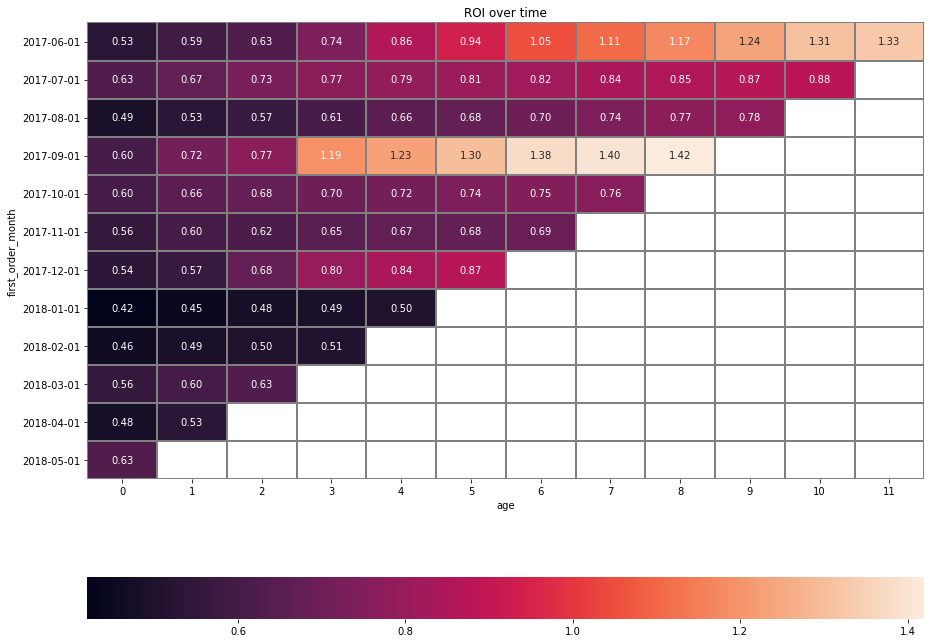

In [99]:
roi_piv.index = roi_piv.index.astype(str)
plt.figure(figsize=(15,12))
sns.heatmap(roi_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='ROI over time')
plt.show()

The ROI is growing slowly and the 2017-09 is the first cohort to return the investment and starts to payoff on it's fourth month and the second cohorts that's starts to payoff is 2017-06. We also see that in general the cohorts behave the same and it will take about a year to payoff. Now we want to see the ROI per source.

In [100]:
ltv_per_source = orders.groupby(['first_source']).agg({'uid':'nunique','revenue':'sum'}).reset_index()
ltv_per_source.columns = ['source_id','buyers','revenue']
ltv_per_source['ltv'] = ltv_per_source['revenue']/ltv_per_source['buyers']
ltv_per_source

,source_id,buyers,revenue,ltv
0,1,3380,35529.84,10.511787
1,2,3554,45721.66,12.864845
2,3,10116,51183.42,5.059650
3,4,9995,55009.80,5.503732
4,5,7104,54478.15,7.668659
5,7,1,1.22,1.220000
6,9,1060,5536.96,5.223547
7,10,1299,4596.15,3.538222


In [101]:
roi_per_source = marketing_per_source.merge(ltv_per_source,on=['source_id'])
roi_per_source['cac'] = roi_per_source['costs']/roi_per_source['buyers']
roi_per_source['romi'] = roi_per_source['ltv']/roi_per_source['cac']
roi_per_source.sort_values('romi', ascending = False, inplace=True)

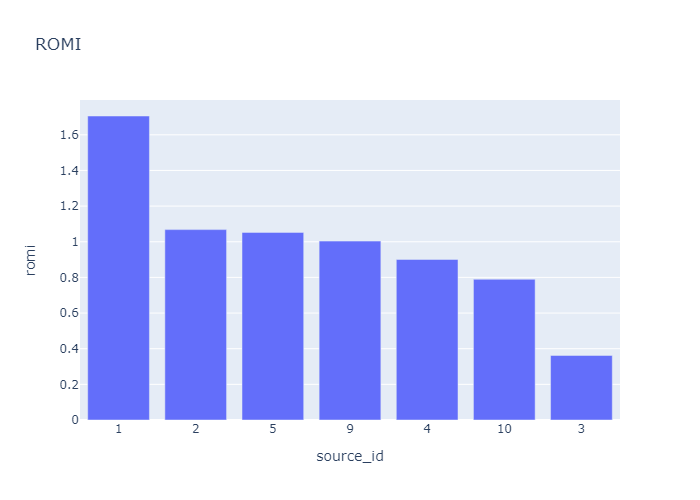

In [102]:
fig = px.bar(roi_per_source, x='source_id', y='romi', title = 'ROMI')
fig.update_xaxes(type='category')
fig.show("png")

**Source 1 is the highest in terms of ROMI** which means that it brought the highest revenue compered to the investment on the marketing. As we saw before, **source 3 is the most expensive one and has the lowest romi**. Sources 1,2,5 and 9 payed off but 4,10 and 3 didn't. Another source we didn't invest money in marketing at all but brought us one custmer was source 7.

## 3. Conclusions
<a class="anchor" id="chapter3"></a>

The data we got was in a good quality but we had some purchases with 0 revenue and it would be better to understand why does it happen.

We found that the average number of daily active users is about 900 and there are two unique dates where we have some extreme values: **the highest is November 24, 2017 which was 'Black Friday'**, probably there were a lot of discounts that encouraged users to visit the platform. **The lowest is March 31, 2018 where was only one visit.** Also there are no records for the April 1, 2018, maybe there was a problem with the platform. In general we can say that in the summer month the visits are a bit lower than in the winter. There are some spikes, probably related to marketing and discounts. Also the small flactuations have a pattern - **the lowest points are of saturdays and sundays!** It is likely that most events take place over the weekend and that most people purchase tickets ahead of time.

We see that the trend is pretty similar for the weekly and monthly active users too. **The avarage number of weekly users is 5.6K and the average amount of monthly active users is 23K.**

Our avarage sticky dactors are pretty close to the minimum, which means that **most of the users don't return to the platform**. It makes sense becuase the platform is for buying tickets for different events, and usually people doesn't go on events on daily or even weekly basis.

Only few users have more than one session a day. The average session length is around 300 sec but the most frquent session is 60 sec long. Also the length of the sessions on black firday were longer than usual, not only the amount of the sessions.
Most of the users purchase in the same day they registered and about **16% of all visitors bacome buyers.**

**The overall average check is about 2.75. The highest average purchase size were in December.**
The most successfull cohort in terms of lifetime value is the 2017-09 cohort, with a great difference. It correlates with the fact that this cohort also had the highest average checks. We should check what made them to act different than the other cohorts.

**Total marketing cost is 329131. Source 3 is the most expensive and is 141321 in total, more than double of the next expensive source. Source 9 is the cheapest.** All the sources have the highest peak in black friday. Most of the marketing expenses were between October to March. In August the expenses are the lowest.
The overall average CAC is 9.14, which means that it costs 9.14 to bring new customer.
We see that for the most expensive sources, the highest CAC is around July and in November december are around the average. For the cheapest sources it's quite different, the highest CAC is around December.

**Source 1 is the highest in terms of ROMI** which means that it brought the highest revenue compered to the investment on the marketing. As we saw before, **source 3 is the most expensive one and has the lowest ROMI.** Sources 1,2,5 and 9 payed off but 4,10 and 3 didn't.

**From all we mentioned above, our recommandations for the marketing team is as follows:**
- **Stop invest in sources 3 and 4.**
- **Increase the investment on source 1, 5 and 9 especially on summer months.**
- **Keep the investment on source 2 the same.**
- **Increase the investment on source 10 in spring months**